In [31]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import collections
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [32]:
weather_df = pd.read_csv('/home/jimit/MastersProject/weather_bronx.csv')
weather_df.head(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Bronx, NY, United States",02/14/2020,39.6,19.4,30.5,6.7,NaN,0.0,0.0,0.0,19.1,303.75,32.3,9.9,17.3,44.28,Clear
1,"Bronx, NY, United States",02/15/2020,29.7,14.8,22.7,6.6,NaN,0.0,0.0,0.0,11.1,194.96,21.9,9.9,19.1,47.21,Clear
2,"Bronx, NY, United States",02/16/2020,42.9,28.7,36.3,18.4,NaN,0.0,0.0,0.0,12.6,204.92,20.8,9.9,55.2,58.65,Partially cloudy
3,"Bronx, NY, United States",02/17/2020,50.7,37.2,43.6,31.8,NaN,0.0,0.0,0.0,12.0,210.50,20.8,9.9,36.9,45.92,Partially cloudy
4,"Bronx, NY, United States",02/18/2020,45.3,37.3,40.9,29.6,NaN,0.0,0.0,0.0,11.7,100.79,20.8,7.6,87.6,73.91,Overcast


In [33]:
weather_df.shape

(367, 17)

In [34]:
weather_df.drop(['Heat Index', 'Conditions','Wind Gust', 'Date time', 'Name'], 'columns', inplace = True)

In [35]:
weather_df[weather_df.isnull().any(axis=1)].count()

Maximum Temperature    181
Minimum Temperature    181
Temperature            181
Wind Chill               0
Precipitation          181
Snow                   181
Snow Depth             181
Wind Speed             181
Wind Direction         181
Visibility             181
Cloud Cover            181
Relative Humidity      181
dtype: int64

In [36]:
weather_df = weather_df.dropna()

In [37]:
weather_df.shape

(186, 12)

In [38]:
weather_corr = weather_df.corr()
weather_corr

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.852445,0.967248,0.851073,0.078096,-0.283126,-0.432419,0.018830,-0.117829,0.070757,-0.056925,0.006346
Minimum Temperature,0.852445,1.000000,0.945461,0.982059,0.126969,-0.287742,-0.415657,-0.029196,-0.250805,-0.062331,0.180246,0.220267
Temperature,0.967248,0.945461,1.000000,0.937506,0.119379,-0.290824,-0.440811,0.020687,-0.179213,0.006844,0.053081,0.104387
Wind Chill,0.851073,0.982059,0.937506,1.000000,0.086401,-0.318113,-0.399948,-0.145591,-0.292171,-0.029741,0.154377,0.214749
Precipitation,0.078096,0.126969,0.119379,0.086401,1.000000,0.333470,0.070818,0.261559,-0.288911,-0.637380,0.402547,0.533965
Snow,-0.283126,-0.287742,-0.290824,-0.318113,0.333470,1.000000,0.506959,0.216185,-0.173036,-0.523667,0.118097,0.179665
Snow Depth,-0.432419,-0.415657,-0.440811,-0.399948,0.070818,0.506959,1.000000,-0.043035,-0.015911,-0.287733,0.203222,0.142172
Wind Speed,0.018830,-0.029196,0.020687,-0.145591,0.261559,0.216185,-0.043035,1.000000,0.321932,-0.125749,0.037299,-0.046167
Wind Direction,-0.117829,-0.250805,-0.179213,-0.292171,-0.288911,-0.173036,-0.015911,0.321932,1.000000,0.439432,-0.449588,-0.524921
Visibility,0.070757,-0.062331,0.006844,-0.029741,-0.637380,-0.523667,-0.287733,-0.125749,0.439432,1.000000,-0.562827,-0.691765


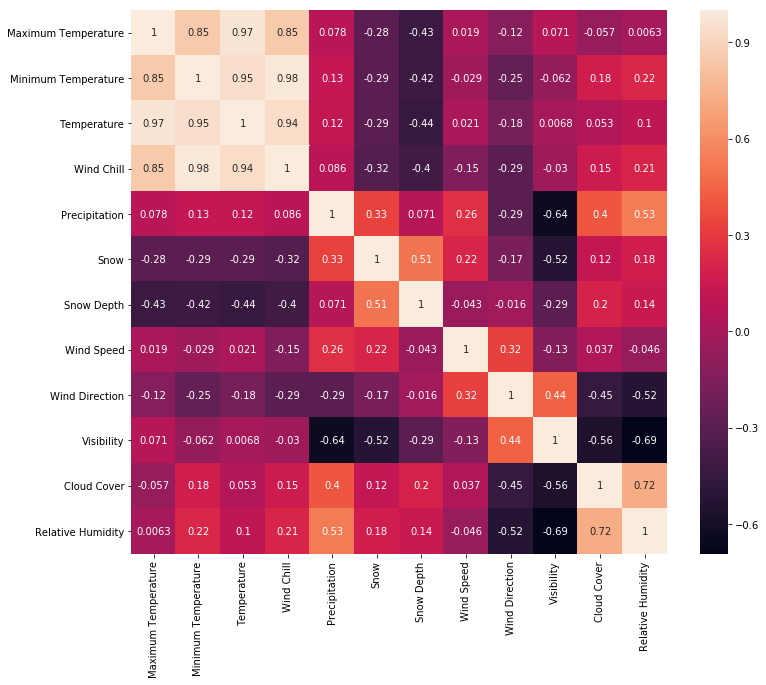

In [39]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(weather_corr, annot=True)

[0 1 1 1 2 0 0 1 0 1 1 2 2 1 0 0 0 1 1 0 0 2 0 0 1 1 2 1 0 1 2 1 1 2 1 1 2
 2 1 2 1 2 2 2 2 1 0 0 2 2 1 2 1 0 0 2 0 0 0 1 1 1 1 1 0 1 2 2 0 0 2 2 0 2
 0 1 0 0 0 0 0 2 2 2 0 1 2 2 2 1 1 0 1 2 2 1 0 1 0 0 0 1 1 2 0 0 1 0 1 2 1
 0 1 1 1 0 0 0 0 0 1 2 1 1 0 2 0 0 1 2 1 0 1 1 1 0 1 1 0 1 0 2 1 2 1 1 0 0
 0 0 0 2 1 1 2 2 1 0 0 0 0 1 0 0 0 1 2 0 0 0 0 2 2 0 0 0 1 0 2 0 1 0 1 1 2
 2]


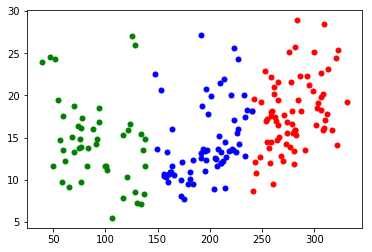

In [40]:
model = KMeans(n_clusters=3)
model.fit(weather_df)
all_predictions = model.predict(weather_df)


centroids = model.cluster_centers_
labels = model.labels_
print(labels)
colors = ["r.", "b.", "g."]

for i in range(len(weather_df)):
    plt.plot(weather_df.iloc[i]["Wind Direction"], weather_df.iloc[i]["Wind Speed"], colors[labels[i]], markersize=10)

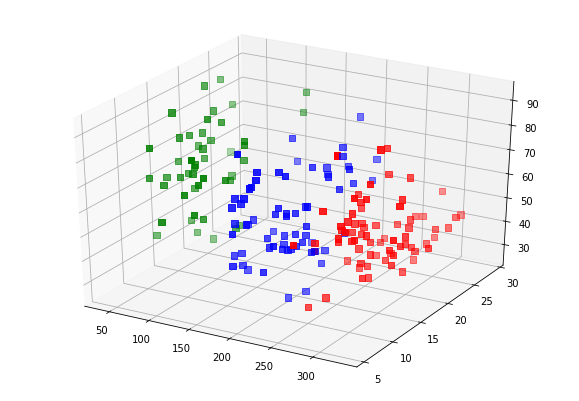

In [41]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'g'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = "3d")

x1 = np.array(weather_df["Wind Direction"])
x2 = np.array(weather_df["Wind Speed"])
x3 = np.array(weather_df["Relative Humidity"])

ax.scatter(x1, x2, x3, marker="s", c=label_color, s=40)
    
plt.show()

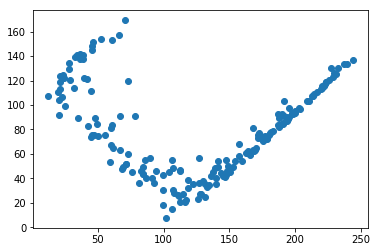

In [13]:
tsne_model = TSNE(learning_rate=1000)
transformed = model.fit_transform(weather_df)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis)
plt.show()

Feature: Maximum Temperature, Score: 0.02517
Feature: Minimum Temperature, Score: 0.02412
Feature: Temperature, Score: 0.02730
Feature: Wind Chill, Score: 0.04610
Feature: Precipitation, Score: 0.03421
Feature: Snow, Score: 0.00605
Feature: Snow Depth, Score: 0.00906
Feature: Wind Speed, Score: 0.05849
Feature: Wind Direction, Score: 0.61303
Feature: Visibility, Score: 0.03744
Feature: Cloud Cover, Score: 0.03266
Feature: Relative Humidity, Score: 0.08637


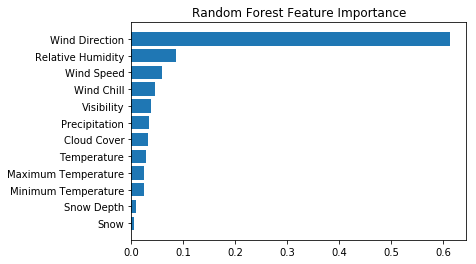

In [50]:
rfdict = {}
rf = RandomForestClassifier()
rf.fit(weather_df, labels)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(weather_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")
for i in range(12):
    print('Feature: %s, Score: %.5f' % (weather_df.columns[i],rf.feature_importances_[i]))
    rfdict[weather_df.columns[i]] = rf.feature_importances_[i]

In [51]:
winddir = weather_df["Wind Direction"]
countN = 0
North = []
countNNE = 0
NorthNorthEast = []
countNE = 0
NorthEast = []
countENE = 0
EastNorthEast = []
countE = 0
East = []
countESE = 0
EastSouthEast = []
countSE = 0
SouthEast = []
countSSE = 0
SouthSouthEast = []
countS = 0
South = []
countSSW = 0
SouthSouthWest = []
countSW = 0
SouthWest = []
countWSW = 0
WestSouthWest = []
countW = 0
West = []
countWNW = 0
WestNorthWest = []
countNW = 0
NorthWest = []
countNNW = 0
NorthNorthWest = []
for i in range(len(winddir.values)):
    if(winddir.values[i] >=350 or winddir.values[i] <=10):
        countN +=1
        North.append(winddir.values[i])
    if(winddir.values[i] >10 and winddir.values[i] <=30):
        countNNE +=1
        NorthNorthEast.append(winddir.values[i])
    if(winddir.values[i] >30 and winddir.values[i] <=50):
        countNE +=1
        NorthEast.append(winddir.values[i])
    if(winddir.values[i] >50 and winddir.values[i] <=70):
        countENE +=1
        EastNorthEast.append(winddir.values[i])
    if(winddir.values[i] >70 and winddir.values[i] <=100):
        countE +=1
        East.append(winddir.values[i])
    if(winddir.values[i] >100 and winddir.values[i] <=120):
        countESE +=1
        EastSouthEast.append(winddir.values[i])
    if(winddir.values[i] >120 and winddir.values[i] <=140):
        countSE +=1
        SouthEast.append(winddir.values[i])
    if(winddir.values[i] >140 and winddir.values[i] <=160):
        countSSE +=1
        SouthSouthEast.append(winddir.values[i])
    if(winddir.values[i] >160 and winddir.values[i] <=190):
        countS +=1
        South.append(winddir.values[i])
    if(winddir.values[i] >190 and winddir.values[i] <=210):
        countSSW +=1
        SouthSouthWest.append(winddir.values[i])
    if(winddir.values[i] >210 and winddir.values[i] <=230):
        countSW +=1
        SouthWest.append(winddir.values[i])
    if(winddir.values[i] >230 and winddir.values[i] <=250):
        countWSW +=1
        WestSouthWest.append(winddir.values[i])
    if(winddir.values[i] >250 and winddir.values[i] <=280):
        countW +=1
        West.append(winddir.values[i])
    if(winddir.values[i] >280 and winddir.values[i] <=300):
        countWNW +=1
        WestNorthWest.append(winddir.values[i])
    if(winddir.values[i] >300 and winddir.values[i] <=320):
        countNW +=1
        NorthWest.append(winddir.values[i])
    if(winddir.values[i] >320 and winddir.values[i] <=340):
        countNNW +=1
        NorthNorthWest.append(winddir.values[i])
print("countN=%d" % (countN))
print("countNNE=%d" % (countNNE))
print("countNE=%d" % (countNE))
print("countENE=%d" % (countENE))
print("countE=%d" % (countE))
print("countESE=%d" % (countESE))
print("countSE=%d" % (countSE))
print("countSSE=%d" % (countSSE))
print("countS=%d" % (countS))
print("countSSW=%d" % (countSSW))
print("countSW=%d" % (countSW))
print("countWSW=%d" % (countWSW))
print("countW=%d" % (countW))
print("countWNW=%d" % (countWNW))
print("countNW=%d" % (countNW))
print("countNNW=%d" % (countNNW))

countN=0
countNNE=0
countNE=3
countENE=10
countE=16
countESE=5
countSE=13
countSSE=8
countS=15
countSSW=19
countSW=19
countWSW=12
countW=33
countWNW=15
countNW=14
countNNW=4


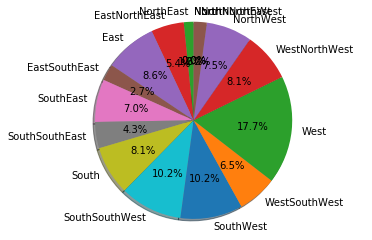

In [52]:
piechart_labels = 'North', 'NorthNorthEast', 'NorthEast', 'EastNorthEast', 'East', 'EastSouthEast', 'SouthEast', 'SouthSouthEast', 'South', 'SouthSouthWest', 'SouthWest', 'WestSouthWest', 'West', 'WestNorthWest', 'NorthWest', 'NorthNorthWest'
piechart_sizes = [countN, countNNE, countNE, countENE, countE, countESE, countSE, countSSE, countS, countSSW, countSW, countWSW, countW, countWNW, countNW, countNNW]
fig1, ax1 = plt.subplots()
ax1.pie(piechart_sizes,labels=piechart_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [53]:
winddir_dict = {countN : North,countNNE : NorthNorthEast, countNE : NorthEast, countENE : EastNorthEast, countE : East, countESE : EastSouthEast, countSE : SouthEast, countSSE : SouthSouthEast, countS : South, countSSW : SouthSouthWest, countSW : SouthWest, countWSW : WestSouthWest, countW : West, countWNW : WestNorthWest, countNW : NorthWest, countNNW : NorthNorthWest }
high = []
moderate = []
low = []
for key, value in winddir_dict.items():
    if((key / len(weather_df)) * 100 >= 10):
        high.append(value)
    if(5 <= (key / len(weather_df)) * 100 < 10):
        moderate.append(value)
    if((0 <= key / len(weather_df)) * 100 < 5):
        low.append(value)
print(min(min(moderate)))
print(max(max(high)))

52.21
279.46


In [54]:
model = GradientBoostingClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, weather_df, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.989 (0.034)


In [55]:
collections.Counter(labels)

Counter({0: 73, 1: 66, 2: 47})

In [56]:
max(weather_df["Wind Speed"]) 

28.9

In [57]:
min(weather_df["Wind Speed"])

5.5

In [58]:
weather_df2 = weather_df.copy()

In [59]:
winddir_df2 = weather_df2["Wind Direction"]
windspeed_df2 = weather_df2["Wind Speed"]
relhumidity_df2 = weather_df2["Relative Humidity"]
asthma_risk = []
print(len(winddir_df2))
if(rfdict['Wind Speed'] > rfdict['Relative Humidity']):
    for k in range(len(winddir_df2.values)):
        if(min(min(moderate)) <= winddir_df2.values[k] <= max(max(high))):
            if(windspeed_df2.values[k]>=20):
                asthma_risk.append("High")
            if(10 <= windspeed_df2.values[k] < 20):
                asthma_risk.append("Moderate")
            if(4 <= windspeed_df2.values[k] < 10):
                asthma_risk.append("Low")
        if(0 <= winddir_df2.values[k] <min(min(moderate)) or max(max(high)) < winddir_df2.values[k] <= 360):
            if(windspeed_df2.values[k]>=20):
                asthma_risk.append("Moderate")
            if(10 <= windspeed_df2.values[k] < 20):
                asthma_risk.append("Low")
            if(4 <= windspeed_df2.values[k] < 10):
                asthma_risk.append("Low")
    print(len(asthma_risk))
else:
    for k in range(len(winddir_df2.values)):
        if(min(min(moderate)) <= winddir_df2.values[k] <= max(max(high))):
            if(50 <= relhumidity_df2.values[k] <= max(relhumidity_df2)):
                if(windspeed_df2.values[k]>=15):
                    asthma_risk.append("High")
                if(10 <= windspeed_df2.values[k] < 15):
                    asthma_risk.append("High")
                if(0 <= windspeed_df2.values[k] < 10):
                    asthma_risk.append("Moderate")
            if(30 <= relhumidity_df2.values[k] < 50):
                if(windspeed_df2.values[k]>=15):
                    asthma_risk.append("Moderate")
                if(10 <= windspeed_df2.values[k] < 15):
                    asthma_risk.append("Moderate")
                if(0 <= windspeed_df2.values[k] < 10):
                    asthma_risk.append("Low")
            if(min(relhumidity_df2) <= relhumidity_df2.values[k] < 30):
                if(windspeed_df2.values[k]>=15):
                    asthma_risk.append("Moderate")
                if(10 <= windspeed_df2.values[k] < 15):
                    asthma_risk.append("Low")
                if(0 <= windspeed_df2.values[k] < 10):
                    asthma_risk.append("Low")
        if(0 <= winddir_df2.values[k] <min(min(moderate)) or max(max(high)) < winddir_df2.values[k] <= 360):
            if(50 <= relhumidity_df2.values[k] <= max(relhumidity_df2)):
                if(windspeed_df2.values[k]>=15):
                    asthma_risk.append("High")
                if(10 <= windspeed_df2.values[k] < 15):
                    asthma_risk.append("High")
                if(0 <= windspeed_df2.values[k] < 10):
                    asthma_risk.append("Moderate")
            if(30 <= relhumidity_df2.values[k] < 50):
                if(windspeed_df2.values[k]>=15):
                    asthma_risk.append("Moderate")
                if(10 <= windspeed_df2.values[k] < 15):
                    asthma_risk.append("Moderate")
                if(0 <= windspeed_df2.values[k] < 10):
                    asthma_risk.append("Low")
            if(min(relhumidity_df2) <= relhumidity_df2.values[k] < 30):
                if(windspeed_df2.values[k]>=15):
                    asthma_risk.append("Moderate")
                if(10 <= windspeed_df2.values[k] < 15):
                    asthma_risk.append("Low")
                if(0 <= windspeed_df2.values[k] < 10):
                    asthma_risk.append("Low")
    print(len(asthma_risk))

186
186


In [60]:
max(weather_df['Relative Humidity'])

92.64

In [61]:
min(weather_df['Relative Humidity'])

25.95

In [62]:
weather_df2["Asthma Risk"] = asthma_risk

In [63]:
collections.Counter(asthma_risk)

Counter({'Moderate': 83, 'High': 97, 'Low': 6})